# Factors Affecting Wine Quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Dataset can be downloaded from [here](https://archive.ics.uci.edu/dataset/186/wine+quality).

In this project we will correlate various factors to quality of red and white wine and visualize which factors have more impact. 

# Data Exploration

 We will import dataset using Pandas library. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
red_wine = pd.read_csv("C:/Users/Linus/Documents/Sheets/winequality-red.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine = pd.read_csv("C:/Users/Linus/Documents/Sheets/winequality-white.csv", sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Correlation

We want to determine which attributes (`pH`, `alcohol level`, etc.) most strongly correlate with `wine quality`. Below, we see the correlation values between quality and the other columns.

In [4]:
red_corr = red_wine.corr()['quality'][:-1]
red_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [5]:
white_corr = white_wine.corr()['quality'][:-1]
white_corr

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

Red wine quality most strongly correlates with alcohol level and volatile acidity. While white wine quality correlates to alcohol leve land density. 

# Plotting The Bar Graphs

We want to visualise the same. We will also use `fivethirtyeight` style rather than default `matplotlib` theme.

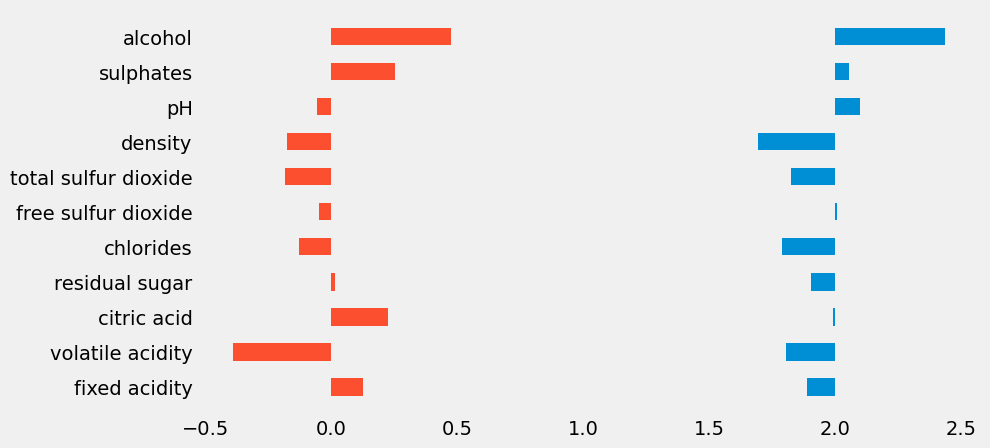

In [6]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9,5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)        # Plots horizontal bar graphs, left parameter creates space
ax.barh(red_corr.index, red_corr,height=0.5)

ax.grid(visible=None)           # Turning off grids
ax.setyticklabels=[]            # Removing the axis labels
ax.setxticklabels=[]


plt.show()

# Customizing Graphs

Now we have graphs that convey some message. But it's not entirely clear to readers. So we will add some structural elements to make it more readable. 

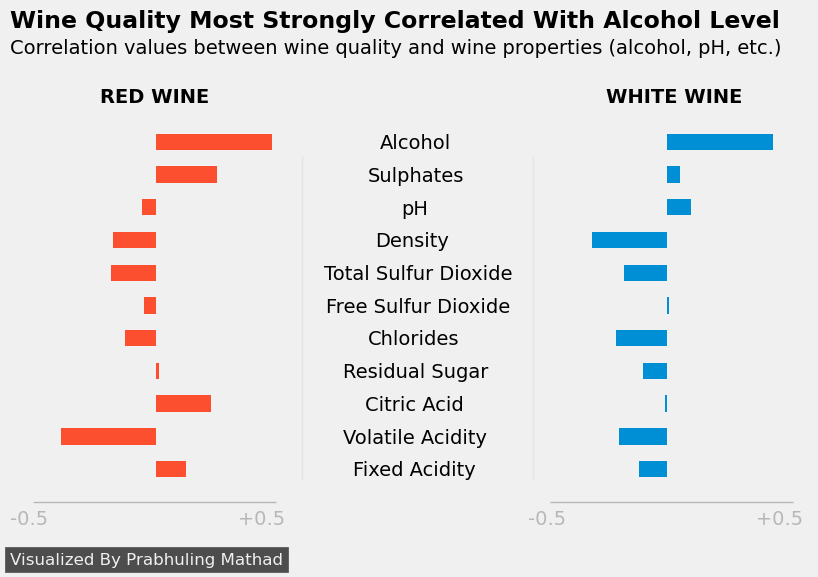

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, left=-0.1, height=0.5)

ax.grid(visible=None)
ax.set_yticklabels([]) 
ax.set_xticklabels([])


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}                      # Adds Y co-ordinate labels in middle
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -=1

ax.axvline(x=0.5, ymin=0.1, ymax=0.9, color='grey', alpha=0.1, linewidth=1)         # Creates vertical line
ax.axvline(x=1.45, ymin=0.1, ymax=0.9, color='grey', alpha=0.1, linewidth=1)
ax.axhline(-1, xmin=0.01, xmax=0.32, color='grey', alpha=0.5, linewidth=1)          # Creates horizontal line
ax.axhline(-1, xmin=0.67, xmax=0.98, color='grey', alpha=0.5, linewidth=1)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5)               # Adds label text on x-axis         
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')                                     # Adds title for each graph
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')

ax.text(-0.7, -2.9, 'Visualized By Prabhuling Mathad',                              # Adds a signature
       color='#f0f0f0', backgroundcolor='#4d4d4d', size=12)

ax.text(-0.7, 13.5,
        'Wine Quality Most Strongly Correlated With Alcohol Level',                 
        size=17, weight='bold')                                                     # Adds title & subtitle
ax.text(-0.7, 12.7,
        'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')

plt.show()

# Coloring Bars Differently

The last change we're going to make to our graph is the bar colors:

1. Positive correlation values will take the color #33A1C9 (a tint of blue).
2. Negative correlation values will take the color #ffae42 (a tint of orange).

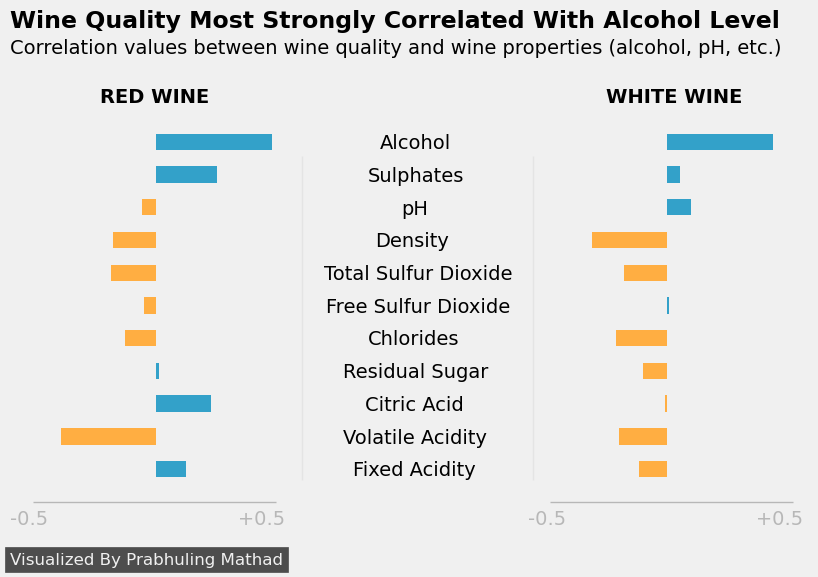

In [8]:
white_corr = white_wine.corr()['quality'][:-1]                               
positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9',
                                      False:'#ffae42'}
                                    )                                           # Separates positive & negative values

red_corr = red_wine.corr()['quality'][:-1]
positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9',
                                 False:'#ffae42'}
                                )


fig, ax = plt.subplots(figsize=(9,5)) 
ax.barh(white_corr.index, white_corr, color=color_map_white, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, color=color_map_red, left=-0.1, height=0.5)     # Color parameter is added


ax.grid(visible=None)
ax.set_yticklabels([]) 
ax.set_xticklabels([])


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -=1

ax.axvline(x=0.5, ymin=0.1, ymax=0.9, color='grey', alpha=0.1, linewidth=1)
ax.axvline(x=1.45, ymin=0.1, ymax=0.9, color='grey', alpha=0.1, linewidth=1)
ax.axhline(-1, xmin=0.01, xmax=0.32, color='grey', alpha=0.5, linewidth=1)
ax.axhline(-1, xmin=0.67, xmax=0.98, color='grey', alpha=0.5, linewidth=1)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')

ax.text(-0.7, -2.9, 'Visualized By Prabhuling Mathad',
       color='#f0f0f0', backgroundcolor='#4d4d4d', size=12)

ax.text(-0.7, 13.5,
        'Wine Quality Most Strongly Correlated With Alcohol Level',
        size=17, weight='bold')
ax.text(-0.7, 12.7,
        'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')

plt.show()

# Conclusion

We can now clearly visualize the factors affecting quality of wine.